# Import Necessary Libs

In [1]:
seed = 999

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import random
import xml.etree.ElementTree as ET

pd.set_option('display.max_columns', None)

In [3]:
np.random.seed(seed)
random.seed(seed)

## Load Dataset

In [4]:
full_df = pd.read_csv('../animelists_cleaned.csv')
full_df

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
0,karthiga,21,586,0000-00-00,0000-00-00,9,1,NaN,0,2013-03-03 10:52:53,NaN
1,karthiga,59,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-10 13:54:51,NaN
2,karthiga,74,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-04-27 16:43:35,NaN
3,karthiga,120,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-03 10:53:57,NaN
4,karthiga,178,26,0000-00-00,0000-00-00,7,2,0.0,0,2013-03-27 15:59:13,NaN
...,...,...,...,...,...,...,...,...,...,...,...
31284025,Yokonightcore,15611,48,2014-00-00,0000-00-00,9,1,NaN,0,2015-09-07 17:33:03,NaN
31284026,Yokonightcore,27815,22,0000-00-00,0000-00-00,9,1,NaN,0,2015-09-07 17:32:05,NaN
31284027,wargod,5945,39,0000-00-00,0000-00-00,8,2,0.0,0,2010-03-29 04:24:12,NaN
31284028,JMc_SetoKai_LoVe,1316,52,0000-00-00,0000-00-00,9,2,NaN,0,2009-12-23 05:45:14,NaN


In [5]:
anime_details = pd.read_csv('../AnimeList.csv')

Drop rows where username is missing

In [6]:
full_df = full_df.dropna(subset=['username'])

Drop rows where show score is zero, as this means it is unrated, and therefore useless data

In [7]:
full_df = full_df[full_df['my_score'] > 0]

In [8]:
full_df.describe()

,anime_id,my_watched_episodes,my_score,my_status,my_rewatching,my_rewatching_ep
count,1.917195e+07,1.917195e+07,1.917195e+07,1.917195e+07,1.411264e+07,1.917195e+07
mean,1.127331e+04,1.809466e+01,7.591404e+00,2.081085e+00,1.202398e-03,2.989212e-01
std,1.101460e+04,4.303521e+01,1.706195e+00,5.134124e-01,3.465475e-02,1.289120e+03
min,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.562000e+03,2.000000e+00,7.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
50%,7.724000e+03,1.200000e+01,8.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
75%,1.867700e+04,2.200000e+01,9.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
max,3.786000e+04,9.999000e+03,1.000000e+01,3.300000e+01,1.000000e+00,5.644513e+06


## Exploratory data analysis

In [9]:
sns.set(rc = {'figure.figsize':(10,10)})

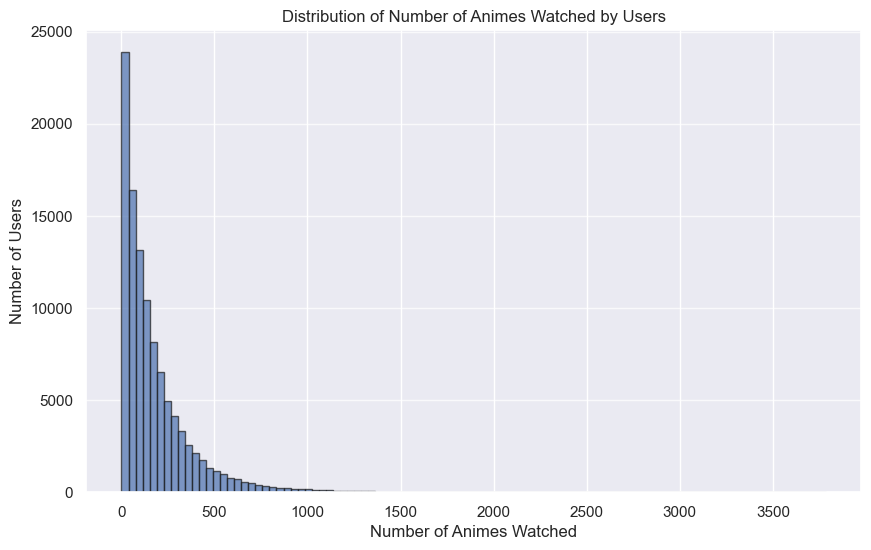

In [10]:
# Step 1: Count the number of animes each user has watched
user_anime_counts = full_df['username'].value_counts()

# Step 2: Plot the distribution
plt.figure(figsize=(10, 6))
plt.hist(user_anime_counts, bins=100, edgecolor='k', alpha=0.7)
plt.title('Distribution of Number of Animes Watched by Users')
plt.xlabel('Number of Animes Watched')
plt.ylabel('Number of Users')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [11]:
full_df['username'].value_counts()

_thiagobrisolla    3785
misterferrari      3442
Shouichirou        3439
SakataYusuke       3383
Kannei             3285
                   ... 
psithurism            1
shaz40                1
karkat                1
Miikan-chan           1
hinogurl_mikha        1
Name: username, Length: 106401, dtype: int64

C:\Users\Mashal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


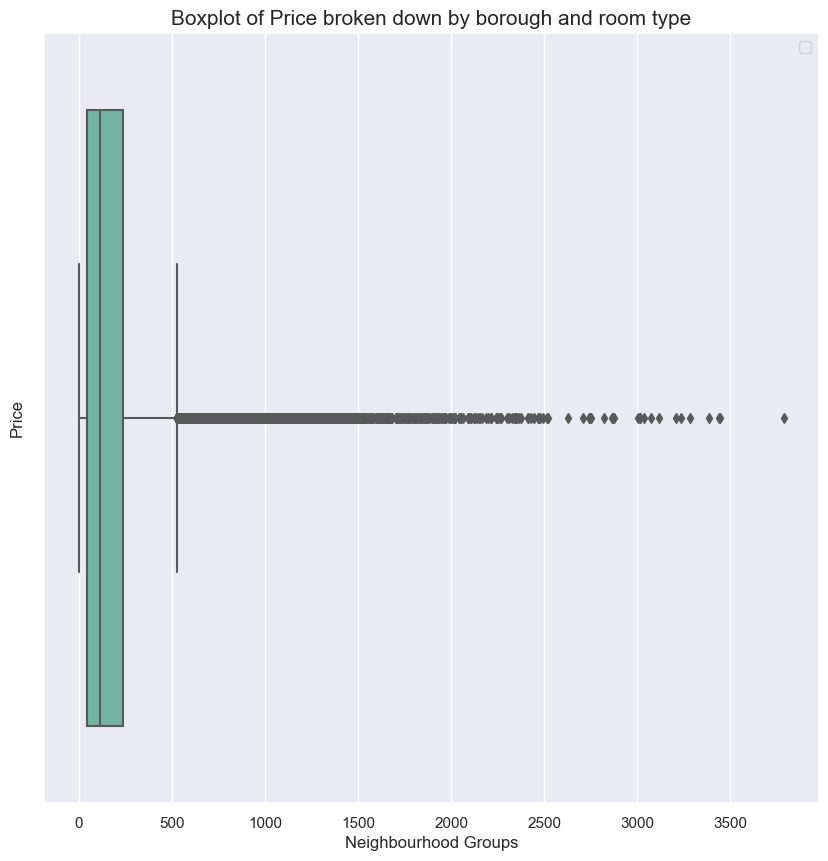

In [12]:
sns.boxplot(user_anime_counts, palette="Set2")
plt.title('Boxplot of Price broken down by borough and room type', fontsize = 15)
plt.xlabel('Neighbourhood Groups')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1, 1))
plt.show();

In [13]:
full_df[full_df['username'] != "karthiga"]

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
53,Damonashu,21,418,0000-00-00,0000-00-00,10,1,0.0,0,2009-09-30 07:39:05,NaN
55,Damonashu,249,167,0000-00-00,0000-00-00,4,2,0.0,0,1970-01-01 00:00:00,NaN
56,Damonashu,269,0,0000-00-00,0000-00-00,2,4,NaN,0,1970-01-01 00:00:00,NaN
57,Damonashu,853,26,0000-00-00,2009-07-31,6,2,0.0,0,2009-07-31 21:07:47,NaN
58,Damonashu,857,25,0000-00-00,2008-08-11,4,2,0.0,0,2008-08-11 17:45:54,NaN
...,...,...,...,...,...,...,...,...,...,...,...
31284025,Yokonightcore,15611,48,2014-00-00,0000-00-00,9,1,NaN,0,2015-09-07 17:33:03,NaN
31284026,Yokonightcore,27815,22,0000-00-00,0000-00-00,9,1,NaN,0,2015-09-07 17:32:05,NaN
31284027,wargod,5945,39,0000-00-00,0000-00-00,8,2,0.0,0,2010-03-29 04:24:12,NaN
31284028,JMc_SetoKai_LoVe,1316,52,0000-00-00,0000-00-00,9,2,NaN,0,2009-12-23 05:45:14,NaN


Keep removing users at random until a user threshold is reached

In [14]:
# usernames = full_df['username'].unique()
# np.random.shuffle(usernames)
# limit = 10000
# username_ind = 0
# while len(full_df['username'].unique()) > limit:
#     full_df = full_df[full_df['username'] != usernames[username_ind]]
#     username_ind += 1

In [15]:
# Get unique users
unique_users = full_df['username'].unique()

# Randomly select users to keep (10,000)
num_users_to_keep = min(len(unique_users), 1000)  # Ensure we keep at most 10,000 users
selected_users = np.random.choice(unique_users, size=num_users_to_keep, replace=False)

# Filter the DataFrame to retain only rows with the selected users
anime_df = full_df[full_df['username'].isin(selected_users)]

print(f"Original number of unique users: {len(unique_users)}")
print(f"Number of unique users after filtering: {anime_df['username'].nunique()}")
print(anime_df.head())

Original number of unique users: 106401
Number of unique users after filtering: 1000
        username  anime_id  my_watched_episodes my_start_date my_finish_date  \
9564  magedgamed        21                  688    0000-00-00     0000-00-00   
9565  magedgamed        59                   26    0000-00-00     2016-08-12   
9566  magedgamed       120                   26    2015-12-12     2015-12-13   
9567  magedgamed       232                   70    0000-00-00     2016-03-21   
9569  magedgamed       249                  167    0000-00-00     2017-02-05   

      my_score  my_status  my_rewatching  my_rewatching_ep  \
9564         9          3            NaN                 0   
9565         6          2            0.0                 0   
9566         7          2            0.0                 0   
9567         7          2            0.0                 0   
9569         6          2            0.0                 0   

          my_last_updated       my_tags  
9564  2015-06-01 18

In [16]:
# Here we confirm that the anime ids of the full dataset is a proper subset of the ids in the information dataset
unique_ids_full = full_df['anime_id'].unique()
unique_ids_details = anime_details['anime_id'].unique()
np.all(np.isin(unique_ids_full, unique_ids_details)) and len(unique_ids_full) < len(unique_ids_details)

True

To reduce the dimensionality of the user-item rating matrix in the numpy arrays later, I reduce the index range.

In [17]:
unique_ids = anime_details['anime_id'].unique()
# Gets list of unique IDs and sorts them
indToId = np.sort(unique_ids)
# Contains translations from anime IDs to numpy array indices
idToInd = {}
for i in range(len(indToId)):
    idToInd[indToId[i]] = i

Adds user ID column

In [18]:
anime_df['user_id'] = pd.factorize(anime_df['username'])[0]

C:\Users\Mashal\AppData\Local\Temp\ipykernel_24376\278079498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_df['user_id'] = pd.factorize(anime_df['username'])[0]


# Split Dataset into Training Dataset and Testing Dataset

In [19]:
train_df, test_df = train_test_split(anime_df, test_size=0.2)
train_df, test_df

(                username  anime_id  my_watched_episodes my_start_date  \
 9009253        RaizenSun     27775                   13    0000-00-00   
 24290223        elmis003     15583                   12    0000-00-00   
 14269793           Yuu25      6922                    1    0000-00-00   
 5960409      Mushinkeina     11013                   12    2012-05-16   
 1778471             June       523                    1    0000-00-00   
 ...                  ...       ...                  ...           ...   
 19102706  DeathwolfBigbo       379                   26    0000-00-00   
 6213077   shadow_wolf_92     32188                    1    0000-00-00   
 3604417        PsyQonaut     23605                   26    2018-04-01   
 14825991       xxxfoxxxx     19951                    1    2015-08-29   
 26554521   Halloween8182      2236                    1    0000-00-00   
 
          my_finish_date  my_score  my_status  my_rewatching  my_rewatching_ep  \
 9009253      2015-07-01    

In [20]:
for row in train_df.itertuples():
    print(row)
    break

Pandas(Index=9009253, username='RaizenSun', anime_id=27775, my_watched_episodes=13, my_start_date='0000-00-00', my_finish_date='2015-07-01', my_score=7, my_status=2, my_rewatching=0.0, my_rewatching_ep=0, my_last_updated='2015-07-01 14:27:26', my_tags=nan, user_id=198)


In [21]:
print(train_df.itertuples(index=False).__next__()._fields)


('username', 'anime_id', 'my_watched_episodes', 'my_start_date', 'my_finish_date', 'my_score', 'my_status', 'my_rewatching', 'my_rewatching_ep', 'my_last_updated', 'my_tags', 'user_id')


In [22]:
anime_df[(anime_df['user_id']==40352)] #  & (anime_df['anime_id']==indToId[3])

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags,user_id


In [23]:
n_users = anime_df['user_id'].nunique()
n_items = anime_details['anime_id'].nunique()

In [24]:
train_df.sort_values(by='user_id')

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags,user_id
9990,magedgamed,34280,12,0000-00-00,2017-10-30,7,2,0.0,0,2017-10-29 22:05:07,"HEADER, lone",0
9929,magedgamed,24833,22,0000-00-00,2015-09-17,9,2,0.0,0,2015-09-17 15:36:39,"HEADER,",0
9800,magedgamed,10793,22,0000-00-00,0000-00-00,8,2,0.0,0,2016-04-24 16:50:10,"HEADER, lone",0
9877,magedgamed,17247,12,0000-00-00,0000-00-00,6,2,0.0,0,2015-03-21 22:54:40,"HEADER, lone",0
10509,magedgamed,455,26,0000-00-00,0000-00-00,8,2,0.0,0,2017-02-11 14:16:17,"HEADER, lone",0
...,...,...,...,...,...,...,...,...,...,...,...,...
31281858,bunnyboo5345,1642,51,0000-00-00,0000-00-00,10,2,0.0,0,2014-04-15 04:22:45,NaN,997
31281853,bunnyboo5345,7645,49,0000-00-00,0000-00-00,10,2,0.0,0,2014-04-15 04:10:18,NaN,997
31283506,murasakigirl7,532,38,2008-12-07,2008-12-07,10,2,0.0,0,2008-12-07 20:36:47,NaN,998
31283910,Animeangel54,7334,39,2012-01-06,2012-01-11,9,2,0.0,0,2012-06-09 14:28:39,NaN,999


In [25]:
# Training dataset
train_ds = np.zeros((n_users, n_items))
for row in train_df.itertuples():
    train_ds[row.user_id, idToInd[row.anime_id]] = row.my_score
train_ds = pd.DataFrame(train_ds)

# Testing dataset
test_ds = np.zeros((n_users, n_items))
for row in test_df.itertuples():
    test_ds[row.user_id, idToInd[row.anime_id]] = row.my_score
test_ds = pd.DataFrame(test_ds)

# Fitting the Algorithm

## User-based

### Compute Pearson Correlation Coefficient for Each Pair of Users in Training Dataset

\begin{equation} 
sim(A,B) = \frac{\sum_{i \in I(A) \cap I(B)}(r_{a,i} - \bar{r_a})(r_{b,i} - \bar{r_b})}
{\sqrt{\sum_{i \in I(A) \cap I(B)}(r_{a,i} - \bar{r_a})^2} \sqrt{\sum_{i \in I(A) \cap I(B)}(r_{b,i} - \bar{r_b})^2}}
\end{equation}

\begin{equation}
sim(A,B) \rightarrow \frac{min(|I(A)\cap I(B)|, \gamma)} {\gamma} sim(A,B)
\end{equation}

In [26]:
GAMMA = 30
EPSILON = 1e-9

np_user_pearson_corr = np.zeros((n_users, n_users))

for i, user_i_vec in enumerate(train_ds.values):
    for j, user_j_vec in enumerate(train_ds.values):

        # ratings corated by the current pair od users
        mask_i = user_i_vec > 0
        mask_j = user_j_vec > 0

        # corrated item index, skip if there are no corrated ratings
        corrated_index = np.intersect1d(np.where(mask_i), np.where(mask_j))
        if len(corrated_index) == 0:
            continue

        # average value of user_i_vec and user_j_vec
        mean_user_i = np.sum(user_i_vec) / (np.sum(np.clip(user_i_vec, 0, 1)) + EPSILON)
        mean_user_j = np.sum(user_j_vec) / (np.sum(np.clip(user_j_vec, 0, 1)) + EPSILON)

        # compute pearson corr
        user_i_sub_mean = user_i_vec[corrated_index] - mean_user_i
        user_j_sub_mean = user_j_vec[corrated_index] - mean_user_j

        r_ui_sub_r_i_sq = np.square(user_i_sub_mean)
        r_uj_sub_r_j_sq = np.square(user_j_sub_mean)

        r_ui_sum_sqrt = np.sqrt(np.sum(r_ui_sub_r_i_sq))
        r_uj_sum_sqrt = np.sqrt(np.sum(r_uj_sub_r_j_sq))

        sim = np.sum(user_i_sub_mean * user_j_sub_mean) / (r_ui_sum_sqrt * r_uj_sum_sqrt + EPSILON)

        # significance weighting
        weighted_sim = (min(len(corrated_index), GAMMA) / GAMMA) * sim

        np_user_pearson_corr[i][j] = weighted_sim

np_user_pearson_corr

array([[ 1.00000000e+00,  5.03061363e-01,  2.24522400e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.03061363e-01,  1.00000000e+00, -1.32513908e-03, ...,
         3.33333333e-02,  0.00000000e+00,  0.00000000e+00],
       [ 2.24522400e-01, -1.32513908e-03,  1.00000000e+00, ...,
        -3.43213766e-02,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  3.33333333e-02, -3.43213766e-02, ...,
         7.00000000e-01,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  3.33333355e-09,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  6.66666665e-02]])

### Predict Ratings

\begin{equation}
P(r_{x,i}) = \bar{x} + \frac{\sum_{u \in S(x)} sim(x,u)(r_{u,i}-\bar{u})}{\sum_{u \in S(x)} sim(x,u)}
\end{equation}

In [27]:
np_predictions = np.zeros((n_users, n_items))

K = 50
EPSILON = 1e-9

for (i, j), rating in np.ndenumerate(test_ds.values):
    if rating > 0:
        # find top-k most similar users as the current user, remove itself
        sim_user_ids = np.argsort(np_user_pearson_corr[i])[-(K + 1):-1]

        # the coefficient values of similar users
        sim_val = np_user_pearson_corr[i][sim_user_ids]

        # the average value of the current user's ratings
        sim_users = train_ds.values[sim_user_ids]
        user_mean = np.sum(train_ds.values[i]) / (np.sum(np.clip(train_ds.values[i], 0, 1)) + EPSILON)
        sim_user_mean = np.sum(sim_users, axis=1) / (np.sum(np.clip(sim_users, 0, 1), axis=1) + EPSILON)

        # select the users who rated item j
        mask_rated_j = sim_users[:, j] > 0
        
        # sim(u, v) * (r_vj - mean_v)
        sim_r_sum_mean = sim_val[mask_rated_j] * (sim_users[mask_rated_j, j] - sim_user_mean[mask_rated_j])

        # filter unrated items
        #w = np.clip(sim_users[mask_rated_j, j], 0, 1)
        #sim_r_sum_mean *= w
        #print(sim_users[:, j])
        
        np_predictions[i][j] = user_mean + np.sum(sim_r_sum_mean) / (np.sum(sim_val[mask_rated_j]) + EPSILON)
        np_predictions[i][j] = np.clip(np_predictions[i][j], 0, 10)
    

### Evaluation

#### Root Mean Squared Error (RMSE)

In [28]:
#==================RMSE on Testing set===================
labels = test_ds.values

# squared error on all ratings
squared_error = np.square(np_predictions - labels)
weight = np.clip(labels, 0, 1)

# squared error on rated ratings
squared_error = squared_error * weight

# RMSE
RMSE = np.sqrt(np.sum(squared_error) / np.sum(weight))

print("RMSE on Testing set (User-based): " + str(RMSE));

RMSE on Testing set (User-based): 1.3450357989377657


#### Mean Absolute Error (MAE)

In [29]:
#==================MAE on Testing set===================#
labels = test_ds.values

# absolute error on all ratings
absolute_error = np.abs(np_predictions - labels)

# weight
weight = np.clip(labels, 0, 1)

# absoulte error on rated ratings
abs_error = absolute_error * weight

# MAE
MAE = np.sum(abs_error) / np.sum(weight)

print("MAE on Testing set (User-based): " + str(MAE));

MAE on Testing set (User-based): 1.001280691425842


In [30]:
np_predictions

array([[0.        , 8.40002978, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 9.04582328, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 8.39867906, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

We now begin to predict the rating of all movies for 1 user

In [26]:
test_np = test_ds.to_numpy()
train_np = train_ds.to_numpy()
test_np

array([[ 0.,  8.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  8., ...,  0.,  0.,  0.],
       [ 0.,  0., 10., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [27]:
train_np

array([[8., 0., 7., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Combine testing and training datasets

In [28]:
anime_ds = np.maximum(train_np, test_np)
anime_ds

array([[ 8.,  8.,  7., ...,  0.,  0.,  0.],
       [ 0.,  0.,  8., ...,  0.,  0.,  0.],
       [ 9.,  0., 10., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [29]:
user0_rated = anime_ds[0] > 0
user0_rated[:100]

array([ True,  True,  True, False, False,  True,  True, False, False,
        True, False,  True, False, False,  True,  True,  True, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
        True,  True,  True, False,  True, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True])

In [30]:
user1_rated = anime_ds[1] > 0
user1_rated[:100]

array([False, False,  True, False, False, False, False, False, False,
       False,  True,  True, False, False,  True, False, False,  True,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False,  True, False, False,  True, False,  True, False,  True,
        True, False,  True,  True,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [31]:
anime_ds[0][:10]

array([8., 8., 7., 0., 0., 8., 8., 0., 0., 9.])

In [32]:
GAMMA = 30
EPSILON = 1e-9

user0_corr = np.zeros(len(anime_ds) - 1)
user0_mean = np.sum(anime_ds[0]) / (np.sum(np.clip(anime_ds[0], 0, 1)) + EPSILON)

for i in range(1, len(anime_ds)):
    row_rated = anime_ds[i] > 0
    corated_index = np.intersect1d(np.where(user0_rated), np.where(row_rated))
    if len(corated_index) == 0:
        continue
    
    sim_user_mean = np.sum(anime_ds[i]) / (np.sum(np.clip(anime_ds[i], 0, 1)) + EPSILON)
    centered_user0 = anime_ds[0][corated_index] - user0_mean
    centered_sim_user = anime_ds[i][corated_index] - sim_user_mean
    
    coratings_sum = np.sum(centered_user0 * centered_sim_user)
    
    # Compute square root of squared sums
    sum_root_user0 = np.sqrt(np.sum(np.square(centered_user0)))
    sum_root_sim_user = np.sqrt(np.sum(np.square(centered_sim_user)))
    
    similarity = coratings_sum / (sum_root_user0 * sum_root_sim_user + EPSILON)
    
    weighted_similarity = similarity * (min(len(corated_index), GAMMA) / GAMMA)
    
    user0_corr[i-1] = weighted_similarity
user0_corr

array([ 4.78343037e-01,  1.55536384e-01,  2.71138500e-01,  4.76413506e-01,
        2.88540825e-01,  1.34331870e-01,  2.20006064e-01,  2.67570775e-01,
        1.08354640e-01,  3.64688869e-01,  3.34016123e-01,  2.64809301e-01,
        1.89125084e-01,  4.18707421e-01,  3.50075819e-01,  4.37633979e-01,
       -3.41594920e-02,  2.24466432e-01,  2.15890296e-01,  9.15919030e-02,
        5.33485740e-02,  4.14042831e-01,  2.67921672e-02,  2.29230919e-01,
        3.52053948e-01,  1.91066540e-01,  2.04615374e-01,  1.19887657e-01,
        4.76504023e-01,  2.58864926e-01,  3.01775052e-01,  4.81431458e-02,
        1.21604848e-01,  4.80929824e-01,  2.95614513e-01,  2.33034177e-01,
        3.33333333e-02,  1.91321389e-01,  2.39692700e-01,  1.93012945e-01,
        4.27120684e-01,  4.42827597e-01,  4.26157796e-01,  2.74400026e-01,
        9.31676933e-02,  3.12442333e-01,  8.87400029e-02,  5.54835145e-01,
        3.06565827e-01,  2.46111443e-01,  0.00000000e+00,  6.56108090e-02,
        5.36471024e-01,  

## NumPy working out

In [33]:
np.arange(20).reshape(4,5)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [34]:
twenty = np.arange(20).reshape(4,5).T
twenty

array([[ 0,  5, 10, 15],
       [ 1,  6, 11, 16],
       [ 2,  7, 12, 17],
       [ 3,  8, 13, 18],
       [ 4,  9, 14, 19]])

In [35]:
np.hstack([twenty,[[el] for el in np.arange(5)]])

array([[ 0,  5, 10, 15,  0],
       [ 1,  6, 11, 16,  1],
       [ 2,  7, 12, 17,  2],
       [ 3,  8, 13, 18,  3],
       [ 4,  9, 14, 19,  4]])

In [36]:
diagram = np.arange(25).reshape(5,5).T
diagram[:,-1] = np.arange(5)
diagram[-1,:] = np.arange(5)
diagram

array([[ 0,  5, 10, 15,  0],
       [ 1,  6, 11, 16,  1],
       [ 2,  7, 12, 17,  2],
       [ 3,  8, 13, 18,  3],
       [ 0,  1,  2,  3,  4]])

In [37]:
twenty > 10

array([[False, False, False,  True],
       [False, False,  True,  True],
       [False, False,  True,  True],
       [False, False,  True,  True],
       [False, False,  True,  True]])

In [38]:
anime_ds[:19,2]

array([ 7.,  8., 10.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,
        8.,  0.,  0.,  7.,  0.,  0.])

In [39]:
len(anime_ds[:,2] > 0)

1000

In [40]:
len(np.zeros(len(anime_ds.T)))

14478

In [41]:
K = 50
ratings = np.zeros(len(anime_ds.T))
user0_mean = np.sum(anime_ds[0]) / (np.sum(np.clip(anime_ds[0], 0, 1)) + EPSILON)

for i in range(len(anime_ds.T)):
    # Selects all users that have rated item i
    rated_users = anime_ds[1:,i] > 0
    
    # Selects the K nearest neighbours, whom have rated item i
    if len(rated_users) >= K:
        sim_user_ids = np.argsort(user0_corr[rated_users])[-K:]
    else:
        sim_user_ids = np.argsort(user0_corr[rated_users])
        
    # the coefficient values of similar users
    sim_val = user0_corr[rated_users][sim_user_ids]
    
    # the average value of the current user's ratings
    
    # This indexes from the second anime_ds row onwards, all the rated users, then the indices of the sim_user_ids
    sim_users = anime_ds[1:][rated_users][sim_user_ids]
    sim_user_mean = np.sum(sim_users, axis=1) / (np.sum(np.clip(sim_users, 0, 1), axis=1) + EPSILON)
    
    # sim(u, v) * (r_vj - mean_v)
    sim_r_sum_mean = sim_val * (sim_users[:, i] - sim_user_mean)

    ratings[i] = user0_mean + np.sum(sim_r_sum_mean) / (np.sum(sim_val) + EPSILON)
ratings

array([8.55013869, 8.31618367, 8.03560983, ..., 7.48316498, 7.48316498,
       7.48316498])

In [42]:
np.argsort(ratings)[::-1]

array([ 5288,  6272, 12222, ...,  9149, 11590,   885], dtype=int64)

In [43]:
top_animes = np.zeros(10)
for i in range(10):
    top_animes[i] = indToId[np.argsort(ratings)[::-1][i]]
top_df = pd.DataFrame(top_animes, columns=['anime_id'])

In [44]:

pd.merge(anime_df[anime_df['user_id']==0], anime_details, how="inner", on='anime_id').sort_values(by='my_score', ascending=False).head(2)

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags,user_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
1187,magedgamed,36308,0,0000-00-00,0000-00-00,10,3,0.0,0,2017-10-05 19:18:22,NaN,0,Blade Runner: Black Out 2022,NaN,BLADE RUNNER BLACK OUT 2022,NaN,https://myanimelist.cdn-dena.com/images/anime/...,ONA,Other,1,Finished Airing,False,"Sep 26, 2017","{'from': '2017-09-26', 'to': '2017-09-26'}",15 min.,R - 17+ (violence & profanity),7.08,7937,3252.0,3189,14026,10,NaN,NaN,NaN,[],NaN,Crunchyroll,Cygames,"Sci-Fi, Thriller",[],"['""Almost Human"" by Lauren Daigle']"
828,magedgamed,1051,0,0000-00-00,0000-00-00,10,3,0.0,0,2017-06-08 17:52:18,NaN,0,Ao no 6-gou,Blue Submarine No. 6,青の6号,"Ao no 6-go, Ao no Rokugou, Ao no Rokugo",https://myanimelist.cdn-dena.com/images/anime/...,OVA,Manga,4,Finished Airing,False,"Oct 25, 1998 to Mar 25, 2000","{'from': '1998-10-25', 'to': '2000-03-25'}",32 min. per ep.,PG-13 - Teens 13 or older,7.14,16149,3026.0,1950,34469,184,NaN,NaN,NaN,"{'Adaptation': [{'mal_id': 43515, 'type': 'man...",NaN,"Bandai Entertainment, Discotek Media",Gonzo,"Action, Adventure, Mecha, Military, Sci-Fi",[],"['""Mina Soko ni Nemure (みなそこに眠れ)"" by The Thril..."


In [45]:
result = pd.merge(top_df, anime_details, on='anime_id', how='left')
result

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,8217.0,Jewelpet Twinkle☆,NaN,ジュエルペット てぃんくる☆,"Jewelpet Twinkle Star, Jewelpet 2, Jewelpet Ti...",https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,52,Finished Airing,False,"Apr 3, 2010 to Apr 2, 2011","{'from': '2010-04-03', 'to': '2011-04-02'}",24 min. per ep.,PG - Children,7.60,1962,1351.0,4691,5529,69,NaN,Spring 2010,Unknown,"{'Adaptation': [{'mal_id': 19898, 'type': 'man...","TV Tokyo, Sotsu, Sanrio, Studio Jack",NaN,Studio Comet,"Fantasy, Magic, School, Shoujo","['""Happy☆Tinkle"" by Masuyama Kayano with Ruby']","['""Sora ni Rakugaki"" by Akari, Miria, and Sara']"
1,10549.0,Precure All Stars GoGo Dream Live!,NaN,ちょ～短編 プリキュアオールスターズ GoGoドリームライブ!,Pretty Cure All Stars GoGo Dream Live!,https://myanimelist.cdn-dena.com/images/anime/...,Special,Original,1,Finished Airing,False,"Nov 8, 2008","{'from': '2008-11-08', 'to': '2008-11-08'}",5 min.,G - All Ages,6.96,821,3714.0,6730,2130,4,NaN,NaN,NaN,"{'Parent story': [{'mal_id': 4703, 'type': 'an...",NaN,NaN,Toei Animation,"Action, Fantasy, Magic, Shoujo",[],[]
2,33993.0,300 En no Otsukiai Anime Edition,NaN,300円のおつきあい Anime Edition,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Manga,1,Finished Airing,False,"Sep 2, 2016","{'from': '2016-09-02', 'to': '2016-09-02'}",16 min.,Rx - Hentai,6.43,1273,NaN,6000,2948,16,NaN,NaN,NaN,[],NaN,NaN,Chippai,Hentai,[],[]
3,34638.0,Jitaku Keibiin,NaN,自宅警備員,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Visual novel,0,Currently Airing,True,"Mar 31, 2017 to ?","{'from': '2017-03-31', 'to': None}",20 min.,Rx - Hentai,6.86,1076,NaN,5668,3425,14,NaN,NaN,NaN,[],NaN,NaN,Suzuki Mirano,Hentai,[],[]
4,36737.0,Real Eroge Situation! The Animation,NaN,リアルエロゲシチュエーション! THE ANIMATION,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Visual novel,0,Currently Airing,True,"Jan 26, 2018 to ?","{'from': '2018-01-26', 'to': None}",Unknown,Rx - Hentai,7.64,501,NaN,6760,2092,12,NaN,NaN,NaN,[],Pink Pineapple,NaN,Seven,Hentai,[],[]
5,36225.0,Baku Ane 2: Otouto Ippai Shibocchau zo! The An...,NaN,ばくあね2 弟いっぱいしぼっちゃうぞ! THE ANIMATION,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Visual novel,0,Currently Airing,True,"Nov 24, 2017 to ?","{'from': '2017-11-24', 'to': None}",30 min.,Rx - Hentai,7.44,1091,NaN,5229,4176,34,NaN,NaN,NaN,"{'Adaptation': [{'mal_id': 109553, 'type': 'ma...",Pink Pineapple,NaN,Seven,Hentai,[],[]
6,34085.0,Sakura Nagashi,NaN,桜流し,NaN,https://myanimelist.cdn-dena.com/images/anime/...,Music,Original,1,Finished Airing,False,"Sep 18, 2016","{'from': '2016-09-18', 'to': '2016-09-18'}",4 min.,PG-13 - Teens 13 or older,7.16,2045,2978.0,5404,3837,13,NaN,NaN,NaN,"{'Other': [{'mal_id': 3785, 'type': 'anime', '...",EMI,NaN,Khara,"Action, Sci-Fi, Music, Drama, Mecha",[],[]
7,13643.0,Imouto Twins,Sex Exchange (2),義妹×2 いもうとツインズ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Original,1,Finished Airing,False,"Sep 8, 2006","{'from': '2006-09-08', 'to': '2006-09-08'}",26 min.,Rx - Hentai,6.06,613,NaN,7091,1788,3,NaN,NaN,NaN,"{'Other': [{'mal_id': 2506, 'type': 'anime', '...",Digital Works,Media Blasters,Y.O.U.C,Hentai,[],[]
8,2921.0,Ashita no Joe 2,Rocky Joe 2,あしたのジョー２,Tomorrow&#039;s Joe 2,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,47,Finished Airing,False,"Oct 13, 1980 to Aug 31, 1981","{'from': '1980-10-13', 'to': '1981-08-31'}",24 min. per ep.,PG-13 - Teens 13 or older,8.60,4275,69.0,3364,12457,529,NaN,Fall 1980,Unknown,"{'Adaptation': [{'mal_id': 1303, 'type': 'mang...",Annapuru,NaN,Tokyo Movie Shinsha,"Action, Drama, Shounen, Slice of Life, Sports","['#1: ""Kizudarake no Eikou"" by Takeshi Obo (ep...","['#1: ""Hateshinaki Yami no Kanata ni"" by Takes..."
9,2518.0,Masuda Kousuke Gekijou Gag Manga Biyori 2,NaN,増田こう

In [46]:
# Parse the XML file
tree = ET.parse('animelist.xml')
root = tree.getroot()

# Define the parent element containing the data
parent_element = 'anime'

# Extract data programmatically
records = []
for record in root.findall(parent_element):
    record_data = {child.tag: child.text for child in record}
    records.append(record_data)

# Convert to DataFrame
df = pd.DataFrame(records)

# Display the DataFrame
print(df)

    series_animedb_id                series_title series_type series_episodes  \
0               52034                "Oshi no Ko"          TV              11   
1               31646             3-gatsu no Lion          TV              22   
2               35180  3-gatsu no Lion 2nd Season          TV              22   
3               38101        5-toubun no Hanayome          TV              12   
4               41457                          86          TV              11   
..                ...                         ...         ...             ...   
407             40911         Yuukoku no Moriarty          TV              11   
408               890         Yuusha-Ou GaoGaiGar          TV              49   
409             23283           Zankyou no Terror          TV              11   
410              5300     Zoku Natsume Yuujinchou          TV              13   
411             36999        Zoku Owarimonogatari          TV               6   

    my_id my_watched_episod

In [47]:
df['series_animedb_id'] = df['series_animedb_id'].astype('int64')

In [48]:
list_full = pd.merge(df, anime_details, how="inner", left_on='series_animedb_id', right_on='anime_id')
list_full.head()

,series_animedb_id,series_title,series_type,series_episodes,my_id,my_watched_episodes,my_start_date,my_finish_date,my_rated,my_score,my_storage,my_storage_value,my_status,my_comments,my_times_watched,my_rewatch_value,my_priority,my_tags,my_rewatching,my_rewatching_ep,my_discuss,my_sns,update_on_import,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,31646,3-gatsu no Lion,TV,22,0,22,2020-01-10,2020-01-17,None,9,None,0.00,Completed,#Crunchyroll #Australia,0,None,LOW,#Crunchyroll #Australia,0,0,1,default,0,31646,3-gatsu no Lion,March comes in like a lion,3月のライオン,Sangatsu no Lion,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,22,Finished Airing,False,"Oct 8, 2016 to Mar 18, 2017","{'from': '2016-10-08', 'to': '2017-03-18'}",25 min. per ep.,PG-13 - Teens 13 or older,8.43,66567,148.0,391,192932,3918,NaN,Fall 2016,Saturdays at 23:00 (JST),"{'Adaptation': [{'mal_id': 1224, 'type': 'mang...","Aniplex, Dentsu, NHK, Hakusensha, Asmik Ace En...",Aniplex of America,Shaft,"Game, Slice of Life, Drama, Seinen","['#1: ""Answer (アンサー)"" by BUMP OF CHICKEN', '#2...","['#1: ""Fighter (ファイター)"" by BUMP OF CHICKEN (ep..."
1,35180,3-gatsu no Lion 2nd Season,TV,22,0,22,2020-01-17,2020-02-12,None,10,None,0.00,Completed,None,0,None,LOW,None,0,0,1,default,0,35180,3-gatsu no Lion 2nd Season,March Comes In Like A Lion 2nd Season,3月のライオン 第2シリーズ,Sangatsu no Lion Second Season,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,22,Finished Airing,False,"Oct 14, 2017 to Mar 31, 2018","{'from': '2017-10-14', 'to': '2018-03-31'}",25 min. per ep.,PG-13 - Teens 13 or older,9.10,30779,9.0,990,85744,2257,NaN,Fall 2017,Saturdays at 23:00 (JST),"{'Adaptation': [{'mal_id': 1224, 'type': 'mang...","Aniplex, Dentsu, NHK, Hakusensha, Asmik Ace En...",Aniplex of America,Shaft,"Drama, Game, Seinen, Slice of Life","['#1: ""Flag wo Tatero (フラッグを立てろ)"" by YUKI', '#...","['#1: ""Kafune (カフネ)"" by Brian the Sun', '#2: ""..."
2,32977,Aggressive Retsuko,TV,100,0,70,2020-07-10,0000-00-00,None,7,None,0.00,Watching,None,0,None,LOW,None,0,0,1,default,0,32977,Aggressive Retsuko,Aggretsuko,アグレッシブ烈子,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,100,Finished Airing,False,"Apr 2, 2016 to Mar 31, 2018","{'from': '2016-04-02', 'to': '2018-03-31'}",1 min. per ep.,PG-13 - Teens 13 or older,7.66,3402,1188.0,2933,16774,99,Aggressive Retsuko aired in the Ousama no Brun...,Spring 2016,Saturdays at 12:00 (JST),"{'Alternative version': [{'mal_id': 36904, 'ty...",Sanrio,NaN,Fanworks,"Music, Comedy",[],[]
3,47,Akira,Movie,1,0,1,2020-04-01,2020-04-01,None,7,None,0.00,Completed,None,0,None,LOW,None,0,0,1,default,0,47,Akira,AKIRA,AKIRA（アキラ）,NaN,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Manga,1,Finished Airing,False,"Jul 16, 1988","{'from': '1988-07-16', 'to': '1988-07-16'}",2 hr. 4 min.,R+ - Mild Nudity,8.16,190829,352.0,198,310133,5029,"Akira won the Silver Scream Award, the audienc...",NaN,NaN,"{'Adaptation': [{'mal_id': 664, 'type': 'manga...","Mainichi Broadcasting System, Kodansha, Toho","Funimation, Bandai Entertainment, Geneon Enter...",Tokyo Movie Shinsha,"Action, Military, Sci-Fi, Adventure, Horror, S...",[],"['""Kaneda"" by Geinoh Yamashiro-gumi']"
4,6547,Angel Beats!,TV,13,0,13,2020-01-26,2020-02-20,None,7,None,0.00,Completed,#Crunchyroll #Australia,0,None,LOW,#Crunchyroll #Australia,0,0,1,default,0,6547,Angel Beats!,Angel Beats!,Angel Beats!（エンジェルビーツ）,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,13,Finished Airing,False,"Apr 3, 2010 to Jun 26, 2010","{'from': '2010-04-03', 'to': '2010-06-26'}",24 min. per ep.,PG-13 - Teens 13 or older,8.31,641851,227.0,7,1010771,36456,Angel Beats! is an original anime that was cre...,Spring 2010,Unknown,"{'Adaptation': [{'mal_id': 16648, 'type': 'man.

In [49]:
list_full.shape

(307, 54)

In [50]:
anime_details.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,False,"Jan 13, 2012 to Mar 30, 2012","{'from': '2012-01-13', 'to': '2012-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,False,"Apr 2, 2007 to Oct 1, 2007","{'from': '2007-04-02', 'to': '2007-10-01'}",24 min. per ep.,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,False,"Oct 4, 2008 to Sep 25, 2009","{'from': '2008-10-04', 'to': '2009-09-25'}",24 min. per ep.,PG - Children,7.55,37129,1508.0,1173,70127,802,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,False,"Aug 16, 2002 to May 23, 2003","{'from': '2002-08-16', 'to': '2003-05-23'}",16 min. per ep.,PG-13 - Teens 13 or older,8.21,36501,307.0,916,93312,3344,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,False,"Oct 6, 2012 to Mar 30, 2013","{'from': '2012-10-06', 'to': '2013-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."


In [51]:
37171 in np.union1d(anime_df['anime_id'].unique(), anime_details['anime_id'].unique())

True

Filter for all anime ids known in the dataset. We exclude any newly introduced anime from the myanimelist.net anime list.

In [52]:
list_filt = list_full[list_full['series_animedb_id'].isin(indToId)]

### Restate the formula
\begin{equation} 
sim(A,B) = \frac{\sum_{i \in I(A) \cap I(B)}(r_{a,i} - \bar{r_a})(r_{b,i} - \bar{r_b})}
{\sqrt{\sum_{i \in I(A) \cap I(B)}(r_{a,i} - \bar{r_a})^2} \sqrt{\sum_{i \in I(A) \cap I(B)}(r_{b,i} - \bar{r_b})^2}}
\end{equation}

\begin{equation}
sim(A,B) \rightarrow \frac{min(|I(A)\cap I(B)|, \gamma)} {\gamma} sim(A,B)
\end{equation}

In [53]:
n_users = anime_df['user_id'].nunique()
n_items = anime_details['anime_id'].nunique()

In [54]:
n_items

14478

In [55]:
anime_ds.shape

(1000, 14478)

In [56]:
anime_ds = np.vstack([anime_ds,np.zeros(anime_ds.shape[1])])

In [57]:
anime_ds.shape

(1001, 14478)

In [58]:
# Training dataset
for row in list_filt.itertuples():
    anime_ds[1000, idToInd[row.series_animedb_id]] = row.my_score
anime_ds

array([[ 8.,  8.,  7., ...,  0.,  0.,  0.],
       [ 0.,  0.,  8., ...,  0.,  0.,  0.],
       [ 9.,  0., 10., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 9.,  0.,  0., ...,  0.,  0.,  0.]])

In [59]:
GAMMA = 30
EPSILON = 1e-9

new_user_rated = anime_ds[1000] > 0

user_main_corr = np.zeros(len(anime_ds) - 1)
user_main_mean = np.sum(anime_ds[1000]) / (np.sum(np.clip(anime_ds[1000], 0, 1)) + EPSILON)

for i in range(len(anime_ds) - 1):
    row_rated = anime_ds[i] > 0
    corated_index = np.intersect1d(np.where(new_user_rated), np.where(row_rated))
    if len(corated_index) == 0:
        continue
    
    sim_user_mean = np.sum(anime_ds[i]) / (np.sum(np.clip(anime_ds[i], 0, 1)) + EPSILON)
    centered_user_main = anime_ds[1000][corated_index] - user_main_mean
    centered_sim_user = anime_ds[i][corated_index] - sim_user_mean
    
    coratings_sum = np.sum(centered_user_main * centered_sim_user)
    
    # Compute square root of squared sums
    sum_root_user_main = np.sqrt(np.sum(np.square(centered_user_main)))
    sum_root_sim_user = np.sqrt(np.sum(np.square(centered_sim_user)))
    
    similarity = coratings_sum / (sum_root_user_main * sum_root_sim_user + EPSILON)
    
    weighted_similarity = similarity * (min(len(corated_index), GAMMA) / GAMMA)
    
    user_main_corr[i-1] = weighted_similarity
user_main_corr

array([ 1.52766201e-01,  2.07634562e-01,  3.52454152e-01,  2.32895626e-01,
        3.23052130e-01, -5.71680889e-02, -2.03085000e-02,  3.02476962e-01,
        2.40985371e-01,  1.79673249e-01,  1.11690034e-01,  2.08124126e-01,
        5.73128349e-01,  2.82784827e-01,  1.42270497e-01,  8.15659268e-02,
        7.23071527e-02,  1.59231827e-01, -7.93336577e-02, -1.05622394e-01,
        5.98815506e-02,  3.07915043e-01,  8.59987703e-02,  1.92235079e-01,
        5.21402082e-01,  1.25366164e-01,  2.81019463e-02, -8.44288793e-02,
        4.45340585e-02,  1.99537059e-01,  2.84792298e-01,  3.26368849e-01,
        6.24196336e-02,  2.06968942e-01, -1.68014435e-02,  5.30764141e-01,
        0.00000000e+00,  7.10586561e-02, -1.14785066e-02,  9.79452427e-02,
        3.62600627e-01, -8.23346482e-02, -7.39243620e-02, -3.74125672e-02,
       -1.38274686e-01,  5.45455762e-01, -8.54715741e-02,  2.59177113e-01,
        1.50749450e-01, -8.40362034e-03,  0.00000000e+00, -6.41652049e-02,
        2.78959906e-02,  

### Restate the formula
\begin{equation}
P(r_{x,i}) = \bar{x} + \frac{\sum_{u \in S(x)} sim(x,u)(r_{u,i}-\bar{u})}{\sum_{u \in S(x)} sim(x,u)}
\end{equation}

In [60]:
# Non-negative correlations
K = 50
n = 0
ratings = np.zeros(len(anime_ds.T))
user_main_mean = np.sum(anime_ds[1000]) / (np.sum(np.clip(anime_ds[1000], 0, 1)) + EPSILON)

for i in range(len(anime_ds.T)):
    # Selects all users that have rated item i
    rated_users = anime_ds[:1000,i] > 0
    
    # Below we return the indices of the correlations of rated_users and whose correlations is greater than 0
    pos_corr = np.intersect1d(np.where(rated_users), np.where(user_main_corr >= 0))
    
    # Selects the K nearest neighbours, whom have rated item i
    sim_user_ids = np.argsort(user_main_corr[pos_corr])[-K:]

    # the coefficient values of similar users
    sim_val = user_main_corr[pos_corr][sim_user_ids]
    
    # the average value of the current user's ratings
    
    # This indexes from the first anime_ds row till the second-last; all the rated users, then the indices of the sim_user_ids
    sim_users = anime_ds[:1000][pos_corr][sim_user_ids]
    sim_user_mean = np.sum(sim_users, axis=1) / (np.sum(np.clip(sim_users, 0, 1), axis=1) + EPSILON)
    
    # sim(u, v) * (r_vj - mean_v)
    sim_r_sum_mean = sim_val * (sim_users[:, i] - sim_user_mean)

    ratings[i] = user_main_mean + np.sum(sim_r_sum_mean) / (np.sum(sim_val) + EPSILON)
    if i == idToInd[29575]:
        print(ratings[i])
ratings

9.5567722861676


array([8.24016132, 8.03423636, 7.84703603, ..., 7.2734375 , 7.2734375 ,
       7.2734375 ])

### Weighted rating
Here we weight the rating so that anime with few ratings do not end up with extreme values

In [84]:
# Non-negative correlations
K = 50
DELTA = 10
ratings = np.zeros(len(anime_ds.T))
user_main_mean = np.sum(anime_ds[1000]) / (np.sum(np.clip(anime_ds[1000], 0, 1)) + EPSILON)

for i in range(len(anime_ds.T)):
    # Selects all users that have rated item i
    rated_users = anime_ds[:1000,i] > 0
    
    # Below we return the indices of the correlations of rated_users and whose correlations is greater than 0
    pos_corr = np.intersect1d(np.where(rated_users), np.where(user_main_corr >= 0))
    
    # Selects the K nearest neighbours, whom have rated item i
    sim_user_ids = np.argsort(user_main_corr[pos_corr])[-K:]

    # the coefficient values of similar users
    sim_val = user_main_corr[pos_corr][sim_user_ids]
    
    # the average value of the current user's ratings
    
    # This indexes from the first anime_ds row till the second-last; all the rated users, then the indices of the sim_user_ids
    sim_users = anime_ds[:1000][pos_corr][sim_user_ids]
    sim_user_mean = np.sum(sim_users, axis=1) / (np.sum(np.clip(sim_users, 0, 1), axis=1) + EPSILON)
    
    # sim(u, v) * (r_vj - mean_v)
    sim_r_sum_mean = sim_val * (sim_users[:, i] - sim_user_mean)

    final_score = user_main_mean + np.sum(sim_r_sum_mean) / (np.sum(sim_val) + EPSILON)
    weighted_rating = final_score * min(len(pos_corr), DELTA) / DELTA
    ratings[i] = weighted_rating
    if i == idToInd[29575]:
        print(ratings[i])
ratings

1.9113544572335202


array([8.24016132, 8.03423636, 7.84703603, ..., 0.        , 0.        ,
       0.        ])

In [87]:
anime_ind = idToInd[820]
np.sum(anime_ds[:1000, anime_ind] > 0)
rated_users = anime_ds[:1000, anime_ind] > 0
pos_corr = np.intersect1d(np.where(rated_users), np.where(user_main_corr >= 0))

sim_user_ids = np.argsort(user_main_corr[pos_corr])[-K:]
sim_val = user_main_corr[pos_corr][sim_user_ids]
sim_users = anime_ds[:1000][pos_corr][sim_user_ids]
sim_user_mean = np.sum(sim_users, axis=1) / (np.sum(np.clip(sim_users, 0, 1), axis=1) + EPSILON)
sim_r_sum_mean = sim_val * (sim_users[:, anime_ind] - sim_user_mean)
final_score = user_main_mean + np.sum(sim_r_sum_mean) / (np.sum(sim_val) + EPSILON)
weighted_rating = final_score * (min(len(pos_corr), 10) / 10)
weighted_rating

9.265255476492767

In [75]:
len(pos_corr)

5

In [62]:
sim_users > 0

array([[ True,  True,  True, ..., False, False, False]])

In [88]:
print(np.where(anime_ds[:1000,anime_ind] > 0))
print(np.argsort(user_main_corr[pos_corr])[-K:])
print("sim_users:")
print(len(sim_users),sim_users)
# counts length or number of total rated items per sim user
print([len(np.where(user > 0)[0]) for user in sim_users])
print(np.sum(sim_users, axis=1) / (np.sum(np.clip(sim_users, 0, 1), axis=1) + EPSILON))
print("sim_users ratings:", sim_users[:, anime_ind])
print("sim_users means:", sim_user_mean)
# subtracts the similar users mean rating from all the similar users normal ratings
print(sim_users[:, anime_ind] - sim_user_mean)
print("sim_val:", sim_val)
print(sim_val * (sim_users[:, anime_ind] - sim_user_mean))
print(np.sum(sim_r_sum_mean), (np.sum(sim_val) + EPSILON))
print(user_main_mean + np.sum(sim_r_sum_mean) / (np.sum(sim_val) + EPSILON))

(array([  0,  20,  25,  71,  74,  84,  86,  88,  98, 127, 158, 162, 169,
       197, 212, 289, 300, 389, 418, 424, 433, 451, 487, 524, 525, 536,
       545, 602, 635, 684, 817], dtype=int64),)
[ 3  5 11 23  1  7 15 16  9  2  0 10 20 14 24  4  8 18 19 21  6 12 17 22
 13]
sim_users:
25 [[ 7.  7.  7. ...  0.  0.  0.]
 [ 0.  0.  4. ...  0.  0.  0.]
 [ 9.  9.  7. ...  0.  0.  0.]
 ...
 [ 9.  0.  9. ...  0.  0.  0.]
 [10.  7.  6. ...  0.  0.  0.]
 [10.  8.  9. ...  0.  0.  0.]]
[393, 219, 216, 1245, 663, 337, 645, 560, 902, 616, 1188, 184, 112, 601, 105, 384, 2377, 733, 471, 503, 377, 318, 129, 143, 1281]
[6.99745547 5.87671233 7.73611111 7.3502008  6.22624434 7.07418398
 9.55348837 7.24464286 5.57427938 4.99675325 7.48316498 6.7173913
 7.86607143 8.08319468 8.07619048 6.703125   6.15523769 6.02455662
 7.71549894 6.53280318 7.8806366  7.3490566  7.58139535 6.76923077
 7.52771272]
sim_users ratings: [ 8.  4. 10. 10.  7.  7. 10.  9. 10. 10.  9. 10. 10.  9. 10.  9.  8. 10.
 10.  6.  8.  8. 10. 

In [69]:
np.argsort(ratings)[-1:-11:-1]

array([ 6272, 13481,  2128, 13806, 12546,  2670,  5105, 13301,  9916,
        9420], dtype=int64)

In [82]:
np.sort(ratings)[-1:-11:-1]

array([11.56339179, 10.47043683, 10.47043683, 10.47043683, 10.47043683,
       10.38480577, 10.23998208, 10.16434655,  9.87672817,  9.7902725 ])

In [65]:
rounded_ratings = np.floor(ratings + 0.5)

In [85]:
top_animes = np.zeros(len(indToId))
top_ratings = np.zeros(len(indToId))
top_real_ratings = np.zeros(len(indToId))

for i in range(len(indToId)):
    top_animes[i] = indToId[np.argsort(ratings)[::-1][i]]
    top_ratings[i] = np.sort(ratings)[::-1][i]
    top_real_ratings[i] = np.sort(ratings)[::-1][i]
data = {
    "anime_id": top_animes,
    "predicted_ratings": np.floor(top_ratings + 0.5),
    "top_real_ratings": top_real_ratings
}
top_df = pd.DataFrame(data)

In [94]:
result = pd.merge(top_df, anime_details, on='anime_id', how='left')
top_25_df = result.sort_values(by=['top_real_ratings','score'], ascending = False)
top_25_df[['anime_id','score','predicted_ratings','top_real_ratings','title','title_english','source', 'episodes']].head(25)
# result[result['predicted_ratings'] == 10].shape

,anime_id,score,predicted_ratings,top_real_ratings,title,title_english,source,episodes
0,820.0,9.11,9.0,9.265255,Ginga Eiyuu Densetsu,Legend of the Galactic Heroes,Novel,110
1,33095.0,8.87,9.0,9.218343,Shouwa Genroku Rakugo Shinjuu: Sukeroku Futata...,Descending Stories: Showa Genroku Rakugo Shinju,Manga,12
2,1974.0,8.18,9.0,9.153655,Glass no Kamen (2005),Glass Mask,Manga,51
3,35180.0,9.10,9.0,9.124663,3-gatsu no Lion 2nd Season,March Comes In Like A Lion 2nd Season,Manga,22
4,15227.0,8.38,9.0,9.115429,Kono Sekai no Katasumi ni,In This Corner of the World,Manga,1
5,34537.0,8.34,9.0,9.056321,Yoru wa Mijikashi Arukeyo Otome,"Night Is Short, Walk on Girl",Novel,1
6,5114.0,9.25,9.0,8.897886,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,Manga,64
7,28149.0,7.50,9.0,8.863112,Nihon Animator Mihonichi,Japan Anima(tor)&#039;s Exhibition,Original,35
8,34599.0,8.91,9.0,8.862190,Made in Abyss,Made in Abyss,Web manga,13
9,21939.0,8.77,9.0,8.793733,Mushishi Zoku Shou,MUSHI-SHI -Next Passage-,Manga,10


In [68]:
result = pd.merge(top_df, anime_details, on='anime_id', how='left')
result

,anime_id,predicted_ratings,top_real_ratings,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,10549.0,12.0,11.563392,Precure All Stars GoGo Dream Live!,NaN,ちょ～短編 プリキュアオールスターズ GoGoドリームライブ!,Pretty Cure All Stars GoGo Dream Live!,https://myanimelist.cdn-dena.com/images/anime/...,Special,Original,1,Finished Airing,False,"Nov 8, 2008","{'from': '2008-11-08', 'to': '2008-11-08'}",5 min.,G - All Ages,6.96,821,3714.0,6730,2130,4,NaN,NaN,NaN,"{'Parent story': [{'mal_id': 4703, 'type': 'an...",NaN,NaN,Toei Animation,"Action, Fantasy, Magic, Shoujo",[],[]
1,36225.0,10.0,10.470437,Baku Ane 2: Otouto Ippai Shibocchau zo! The An...,NaN,ばくあね2 弟いっぱいしぼっちゃうぞ! THE ANIMATION,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Visual novel,0,Currently Airing,True,"Nov 24, 2017 to ?","{'from': '2017-11-24', 'to': None}",30 min.,Rx - Hentai,7.44,1091,NaN,5229,4176,34,NaN,NaN,NaN,"{'Adaptation': [{'mal_id': 109553, 'type': 'ma...",Pink Pineapple,NaN,Seven,Hentai,[],[]
2,2325.0,10.0,10.470437,Angel Blade Punish!,NaN,エンジェルブレイドパニッシュ！,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Original,3,Finished Airing,False,"Dec 29, 2004 to Sep 9, 2005","{'from': '2004-12-29', 'to': '2005-09-09'}",30 min. per ep.,Rx - Hentai,6.52,2133,NaN,4986,4733,26,NaN,NaN,NaN,"{'Prequel': [{'mal_id': 2324, 'type': 'anime',...",NaN,NaN,Asahi Production,"Adventure, Hentai, Magic, Sci-Fi","['""GO WAY!!"" by Faylan']",[]
3,36737.0,10.0,10.470437,Real Eroge Situation! The Animation,NaN,リアルエロゲシチュエーション! THE ANIMATION,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Visual novel,0,Currently Airing,True,"Jan 26, 2018 to ?","{'from': '2018-01-26', 'to': None}",Unknown,Rx - Hentai,7.64,501,NaN,6760,2092,12,NaN,NaN,NaN,[],Pink Pineapple,NaN,Seven,Hentai,[],[]
4,34638.0,10.0,10.470437,Jitaku Keibiin,NaN,自宅警備員,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Visual novel,0,Currently Airing,True,"Mar 31, 2017 to ?","{'from': '2017-03-31', 'to': None}",20 min.,Rx - Hentai,6.86,1076,NaN,5668,3425,14,NaN,NaN,NaN,[],NaN,NaN,Suzuki Mirano,Hentai,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14473,33975.0,1.0,1.475257,3-Nen D-Gumi Glass no Kamen,The Glass Mask Year 3 Class D,３ねんＤぐみガラスの仮面,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,13,Finished Airing,False,"Oct 3, 2016 to Dec 26, 2016","{'from': '2016-10-03', 'to': '2016-12-26'}",4 min. per ep.,PG - Children,4.97,453,9067.0,7644,1373,1,NaN,Fall 2016,Mondays at 21:55 (JST),"{'Adaptation': [{'mal_id': 1469, 'type': 'mang...",NaN,NaN,DLE,"Comedy, Parody, School",[],"['""Tasogare no End (黄昏のエンド)"" by Maya Kitajima ..."
14474,24417.0,1.0,1.015126,Maido! Urayasu Tekkin Kazoku,NaN,毎度! 浦安鉄筋家族,"Always! Reinforced Urayasu Family, Always! Sup...",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,False,"Jul 6, 2014 to Dec 28, 2014","{'from': '2014-07-06', 'to': '2014-12-28'}",3 min. per ep.,PG-13 - Teens 13 or older,6.17,102,6874.0,9402,536,2,NaN,Summer 2014,Unknown,"{'Adaptation': [{'mal_id': 28725, 'type': 'man...",NaN,NaN,Studio Deen,"Comedy, Shounen","['#1: ""Hagane no Machi (鋼の街)"" by Tetsuya Kanmu...",[]
14475,32563.0,1.0,0.876728,Starry Tales: Seiza wa Toki wo Koete,NaN,スターリーテイルズ ～星座は時をこえて～,NaN,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Original,1,Finished Airing,False,"Mar 19, 2011","{'from': '2011-03-19', 'to': '2011-03-19'}",27 min.,PG - Children,5.75,156,7908.0,9394,538,1,NaN,NaN,NaN,[],NaN,NaN,KAGAYA Studio,"Fantasy, Space",[],[]
14476,32851.0,1.0,0.876728,Riding the Storm,NaN,Riding the Storm,NaN,https://myanimelist.cdn-dena.com/images/anime/...,Music,Music,1,Finished Airing,False,"Jun 18, 2007","{'from': '2007-06-18', 'to': '2007-06-1

In [83]:
result[result['anime_id']==2921]

,anime_id,predicted_ratings,top_real_ratings,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
5,2921.0,10.0,10.384806,Ashita no Joe 2,Rocky Joe 2,あしたのジョー２,Tomorrow&#039;s Joe 2,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,47,Finished Airing,False,"Oct 13, 1980 to Aug 31, 1981","{'from': '1980-10-13', 'to': '1981-08-31'}",24 min. per ep.,PG-13 - Teens 13 or older,8.6,4275,69.0,3364,12457,529,NaN,Fall 1980,Unknown,"{'Adaptation': [{'mal_id': 1303, 'type': 'mang...",Annapuru,NaN,Tokyo Movie Shinsha,"Action, Drama, Shounen, Slice of Life, Sports","['#1: ""Kizudarake no Eikou"" by Takeshi Obo (ep...","['#1: ""Hateshinaki Yami no Kanata ni"" by Takes..."


# Afif anime predictions:

In [46]:
# Parse the XML file
tree = ET.parse('animelist.xml')
root = tree.getroot()

# Define the parent element containing the data
parent_element = 'anime'

# Extract data programmatically
records = []
for record in root.findall(parent_element):
    record_data = {child.tag: child.text for child in record}
    records.append(record_data)

# Convert to DataFrame
df = pd.DataFrame(records)

# Display the DataFrame
print(df)

    series_animedb_id                series_title series_type series_episodes  \
0               52034                "Oshi no Ko"          TV              11   
1               31646             3-gatsu no Lion          TV              22   
2               35180  3-gatsu no Lion 2nd Season          TV              22   
3               38101        5-toubun no Hanayome          TV              12   
4               41457                          86          TV              11   
..                ...                         ...         ...             ...   
407             40911         Yuukoku no Moriarty          TV              11   
408               890         Yuusha-Ou GaoGaiGar          TV              49   
409             23283           Zankyou no Terror          TV              11   
410              5300     Zoku Natsume Yuujinchou          TV              13   
411             36999        Zoku Owarimonogatari          TV               6   

    my_id my_watched_episod

In [47]:
df['series_animedb_id'] = df['series_animedb_id'].astype('int64')

In [48]:
list_full = pd.merge(df, anime_details, how="inner", left_on='series_animedb_id', right_on='anime_id')
list_full.head()

,series_animedb_id,series_title,series_type,series_episodes,my_id,my_watched_episodes,my_start_date,my_finish_date,my_rated,my_score,my_storage,my_storage_value,my_status,my_comments,my_times_watched,my_rewatch_value,my_priority,my_tags,my_rewatching,my_rewatching_ep,my_discuss,my_sns,update_on_import,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,31646,3-gatsu no Lion,TV,22,0,22,2020-01-10,2020-01-17,None,9,None,0.00,Completed,#Crunchyroll #Australia,0,None,LOW,#Crunchyroll #Australia,0,0,1,default,0,31646,3-gatsu no Lion,March comes in like a lion,3月のライオン,Sangatsu no Lion,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,22,Finished Airing,False,"Oct 8, 2016 to Mar 18, 2017","{'from': '2016-10-08', 'to': '2017-03-18'}",25 min. per ep.,PG-13 - Teens 13 or older,8.43,66567,148.0,391,192932,3918,NaN,Fall 2016,Saturdays at 23:00 (JST),"{'Adaptation': [{'mal_id': 1224, 'type': 'mang...","Aniplex, Dentsu, NHK, Hakusensha, Asmik Ace En...",Aniplex of America,Shaft,"Game, Slice of Life, Drama, Seinen","['#1: ""Answer (アンサー)"" by BUMP OF CHICKEN', '#2...","['#1: ""Fighter (ファイター)"" by BUMP OF CHICKEN (ep..."
1,35180,3-gatsu no Lion 2nd Season,TV,22,0,22,2020-01-17,2020-02-12,None,10,None,0.00,Completed,None,0,None,LOW,None,0,0,1,default,0,35180,3-gatsu no Lion 2nd Season,March Comes In Like A Lion 2nd Season,3月のライオン 第2シリーズ,Sangatsu no Lion Second Season,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,22,Finished Airing,False,"Oct 14, 2017 to Mar 31, 2018","{'from': '2017-10-14', 'to': '2018-03-31'}",25 min. per ep.,PG-13 - Teens 13 or older,9.10,30779,9.0,990,85744,2257,NaN,Fall 2017,Saturdays at 23:00 (JST),"{'Adaptation': [{'mal_id': 1224, 'type': 'mang...","Aniplex, Dentsu, NHK, Hakusensha, Asmik Ace En...",Aniplex of America,Shaft,"Drama, Game, Seinen, Slice of Life","['#1: ""Flag wo Tatero (フラッグを立てろ)"" by YUKI', '#...","['#1: ""Kafune (カフネ)"" by Brian the Sun', '#2: ""..."
2,32977,Aggressive Retsuko,TV,100,0,70,2020-07-10,0000-00-00,None,7,None,0.00,Watching,None,0,None,LOW,None,0,0,1,default,0,32977,Aggressive Retsuko,Aggretsuko,アグレッシブ烈子,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,100,Finished Airing,False,"Apr 2, 2016 to Mar 31, 2018","{'from': '2016-04-02', 'to': '2018-03-31'}",1 min. per ep.,PG-13 - Teens 13 or older,7.66,3402,1188.0,2933,16774,99,Aggressive Retsuko aired in the Ousama no Brun...,Spring 2016,Saturdays at 12:00 (JST),"{'Alternative version': [{'mal_id': 36904, 'ty...",Sanrio,NaN,Fanworks,"Music, Comedy",[],[]
3,47,Akira,Movie,1,0,1,2020-04-01,2020-04-01,None,7,None,0.00,Completed,None,0,None,LOW,None,0,0,1,default,0,47,Akira,AKIRA,AKIRA（アキラ）,NaN,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Manga,1,Finished Airing,False,"Jul 16, 1988","{'from': '1988-07-16', 'to': '1988-07-16'}",2 hr. 4 min.,R+ - Mild Nudity,8.16,190829,352.0,198,310133,5029,"Akira won the Silver Scream Award, the audienc...",NaN,NaN,"{'Adaptation': [{'mal_id': 664, 'type': 'manga...","Mainichi Broadcasting System, Kodansha, Toho","Funimation, Bandai Entertainment, Geneon Enter...",Tokyo Movie Shinsha,"Action, Military, Sci-Fi, Adventure, Horror, S...",[],"['""Kaneda"" by Geinoh Yamashiro-gumi']"
4,6547,Angel Beats!,TV,13,0,13,2020-01-26,2020-02-20,None,7,None,0.00,Completed,#Crunchyroll #Australia,0,None,LOW,#Crunchyroll #Australia,0,0,1,default,0,6547,Angel Beats!,Angel Beats!,Angel Beats!（エンジェルビーツ）,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,13,Finished Airing,False,"Apr 3, 2010 to Jun 26, 2010","{'from': '2010-04-03', 'to': '2010-06-26'}",24 min. per ep.,PG-13 - Teens 13 or older,8.31,641851,227.0,7,1010771,36456,Angel Beats! is an original anime that was cre...,Spring 2010,Unknown,"{'Adaptation': [{'mal_id': 16648, 'type': 'man.

In [49]:
list_full.shape

(307, 54)

In [50]:
anime_details.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,False,"Jan 13, 2012 to Mar 30, 2012","{'from': '2012-01-13', 'to': '2012-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,False,"Apr 2, 2007 to Oct 1, 2007","{'from': '2007-04-02', 'to': '2007-10-01'}",24 min. per ep.,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,False,"Oct 4, 2008 to Sep 25, 2009","{'from': '2008-10-04', 'to': '2009-09-25'}",24 min. per ep.,PG - Children,7.55,37129,1508.0,1173,70127,802,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,False,"Aug 16, 2002 to May 23, 2003","{'from': '2002-08-16', 'to': '2003-05-23'}",16 min. per ep.,PG-13 - Teens 13 or older,8.21,36501,307.0,916,93312,3344,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,False,"Oct 6, 2012 to Mar 30, 2013","{'from': '2012-10-06', 'to': '2013-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."


In [51]:
37171 in np.union1d(anime_df['anime_id'].unique(), anime_details['anime_id'].unique())

True

Filter for all anime ids known in the dataset. We exclude any newly introduced anime from the myanimelist.net anime list.

In [52]:
list_filt = list_full[list_full['series_animedb_id'].isin(indToId)]

### Restate the formula
\begin{equation} 
sim(A,B) = \frac{\sum_{i \in I(A) \cap I(B)}(r_{a,i} - \bar{r_a})(r_{b,i} - \bar{r_b})}
{\sqrt{\sum_{i \in I(A) \cap I(B)}(r_{a,i} - \bar{r_a})^2} \sqrt{\sum_{i \in I(A) \cap I(B)}(r_{b,i} - \bar{r_b})^2}}
\end{equation}

\begin{equation}
sim(A,B) \rightarrow \frac{min(|I(A)\cap I(B)|, \gamma)} {\gamma} sim(A,B)
\end{equation}

In [53]:
n_users = anime_df['user_id'].nunique()
n_items = anime_details['anime_id'].nunique()

In [54]:
n_items

14478

In [55]:
anime_ds.shape

(1000, 14478)

In [56]:
anime_ds = np.vstack([anime_ds,np.zeros(anime_ds.shape[1])])

In [57]:
anime_ds.shape

(1001, 14478)

In [58]:
# Training dataset
for row in list_filt.itertuples():
    anime_ds[1000, idToInd[row.series_animedb_id]] = row.my_score
anime_ds

array([[ 8.,  8.,  7., ...,  0.,  0.,  0.],
       [ 0.,  0.,  8., ...,  0.,  0.,  0.],
       [ 9.,  0., 10., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 9.,  0.,  0., ...,  0.,  0.,  0.]])

In [59]:
GAMMA = 30
EPSILON = 1e-9

new_user_rated = anime_ds[1000] > 0

user_main_corr = np.zeros(len(anime_ds) - 1)
user_main_mean = np.sum(anime_ds[1000]) / (np.sum(np.clip(anime_ds[1000], 0, 1)) + EPSILON)

for i in range(len(anime_ds) - 1):
    row_rated = anime_ds[i] > 0
    corated_index = np.intersect1d(np.where(new_user_rated), np.where(row_rated))
    if len(corated_index) == 0:
        continue
    
    sim_user_mean = np.sum(anime_ds[i]) / (np.sum(np.clip(anime_ds[i], 0, 1)) + EPSILON)
    centered_user_main = anime_ds[1000][corated_index] - user_main_mean
    centered_sim_user = anime_ds[i][corated_index] - sim_user_mean
    
    coratings_sum = np.sum(centered_user_main * centered_sim_user)
    
    # Compute square root of squared sums
    sum_root_user_main = np.sqrt(np.sum(np.square(centered_user_main)))
    sum_root_sim_user = np.sqrt(np.sum(np.square(centered_sim_user)))
    
    similarity = coratings_sum / (sum_root_user_main * sum_root_sim_user + EPSILON)
    
    weighted_similarity = similarity * (min(len(corated_index), GAMMA) / GAMMA)
    
    user_main_corr[i-1] = weighted_similarity
user_main_corr

array([ 1.52766201e-01,  2.07634562e-01,  3.52454152e-01,  2.32895626e-01,
        3.23052130e-01, -5.71680889e-02, -2.03085000e-02,  3.02476962e-01,
        2.40985371e-01,  1.79673249e-01,  1.11690034e-01,  2.08124126e-01,
        5.73128349e-01,  2.82784827e-01,  1.42270497e-01,  8.15659268e-02,
        7.23071527e-02,  1.59231827e-01, -7.93336577e-02, -1.05622394e-01,
        5.98815506e-02,  3.07915043e-01,  8.59987703e-02,  1.92235079e-01,
        5.21402082e-01,  1.25366164e-01,  2.81019463e-02, -8.44288793e-02,
        4.45340585e-02,  1.99537059e-01,  2.84792298e-01,  3.26368849e-01,
        6.24196336e-02,  2.06968942e-01, -1.68014435e-02,  5.30764141e-01,
        0.00000000e+00,  7.10586561e-02, -1.14785066e-02,  9.79452427e-02,
        3.62600627e-01, -8.23346482e-02, -7.39243620e-02, -3.74125672e-02,
       -1.38274686e-01,  5.45455762e-01, -8.54715741e-02,  2.59177113e-01,
        1.50749450e-01, -8.40362034e-03,  0.00000000e+00, -6.41652049e-02,
        2.78959906e-02,  

In [84]:
# Non-negative correlations
K = 50
DELTA = 10
ratings = np.zeros(len(anime_ds.T))
user_main_mean = np.sum(anime_ds[1000]) / (np.sum(np.clip(anime_ds[1000], 0, 1)) + EPSILON)

for i in range(len(anime_ds.T)):
    # Selects all users that have rated item i
    rated_users = anime_ds[:1000,i] > 0
    
    # Below we return the indices of the correlations of rated_users and whose correlations is greater than 0
    pos_corr = np.intersect1d(np.where(rated_users), np.where(user_main_corr >= 0))
    
    # Selects the K nearest neighbours, whom have rated item i
    sim_user_ids = np.argsort(user_main_corr[pos_corr])[-K:]

    # the coefficient values of similar users
    sim_val = user_main_corr[pos_corr][sim_user_ids]
    
    # the average value of the current user's ratings
    
    # This indexes from the first anime_ds row till the second-last; all the rated users, then the indices of the sim_user_ids
    sim_users = anime_ds[:1000][pos_corr][sim_user_ids]
    sim_user_mean = np.sum(sim_users, axis=1) / (np.sum(np.clip(sim_users, 0, 1), axis=1) + EPSILON)
    
    # sim(u, v) * (r_vj - mean_v)
    sim_r_sum_mean = sim_val * (sim_users[:, i] - sim_user_mean)

    final_score = user_main_mean + np.sum(sim_r_sum_mean) / (np.sum(sim_val) + EPSILON)
    weighted_rating = final_score * min(len(pos_corr), DELTA) / DELTA
    ratings[i] = weighted_rating
    if i == idToInd[29575]:
        print(ratings[i])
ratings

1.9113544572335202


array([8.24016132, 8.03423636, 7.84703603, ..., 0.        , 0.        ,
       0.        ])

In [85]:
top_animes = np.zeros(len(indToId))
top_ratings = np.zeros(len(indToId))
top_real_ratings = np.zeros(len(indToId))

for i in range(len(indToId)):
    top_animes[i] = indToId[np.argsort(ratings)[::-1][i]]
    top_ratings[i] = np.sort(ratings)[::-1][i]
    top_real_ratings[i] = np.sort(ratings)[::-1][i]
data = {
    "anime_id": top_animes,
    "predicted_ratings": np.floor(top_ratings + 0.5),
    "top_real_ratings": top_real_ratings
}
top_df = pd.DataFrame(data)

In [94]:
result = pd.merge(top_df, anime_details, on='anime_id', how='left')
top_25_df = result.sort_values(by=['top_real_ratings','score'], ascending = False)
top_25_df[['anime_id','score','predicted_ratings','top_real_ratings','title','title_english','source', 'episodes']].head(25)
# result[result['predicted_ratings'] == 10].shape

,anime_id,score,predicted_ratings,top_real_ratings,title,title_english,source,episodes
0,820.0,9.11,9.0,9.265255,Ginga Eiyuu Densetsu,Legend of the Galactic Heroes,Novel,110
1,33095.0,8.87,9.0,9.218343,Shouwa Genroku Rakugo Shinjuu: Sukeroku Futata...,Descending Stories: Showa Genroku Rakugo Shinju,Manga,12
2,1974.0,8.18,9.0,9.153655,Glass no Kamen (2005),Glass Mask,Manga,51
3,35180.0,9.10,9.0,9.124663,3-gatsu no Lion 2nd Season,March Comes In Like A Lion 2nd Season,Manga,22
4,15227.0,8.38,9.0,9.115429,Kono Sekai no Katasumi ni,In This Corner of the World,Manga,1
5,34537.0,8.34,9.0,9.056321,Yoru wa Mijikashi Arukeyo Otome,"Night Is Short, Walk on Girl",Novel,1
6,5114.0,9.25,9.0,8.897886,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,Manga,64
7,28149.0,7.50,9.0,8.863112,Nihon Animator Mihonichi,Japan Anima(tor)&#039;s Exhibition,Original,35
8,34599.0,8.91,9.0,8.862190,Made in Abyss,Made in Abyss,Web manga,13
9,21939.0,8.77,9.0,8.793733,Mushishi Zoku Shou,MUSHI-SHI -Next Passage-,Manga,10
